In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install lxml
!pip install pandas
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = "https://www.worldometers.info/coronavirus/"
import requests
html = requests.get(url).content

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
tbody = soup.find('tbody')

In [ ]:
tbody = soup.find('tbody')

In [ ]:
table_rows = tbody.find_all('tr')

In [ ]:
table_rows[9].find_all('td')

[<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">2</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/india/">India</a></td>,
 <td style="font-weight: bold; text-align:right">44,808,022</td>,
 <td style="font-weight: bold; text-align:right;"></td>,
 <td style="font-weight: bold; text-align:right;">531,091                                </td>,
 <td style="font-weight: bold; 
                                     text-align:right;"></td>,
 <td style="font-weight: bold; text-align:right">44,223,211</td>,
 <td style="font-weight: bold; text-align:right;"></td>,
 <td style="text-align:right;font-weight:bold;">53,720</td>,
 <td style="font-weight: bold; text-align:right">N/A</td>,
 <td style="font-weight: bold; text-align:right">31,855</td>,
 <td style="font-weight: bold; text-align:right">378</td>,
 <td style="font-weight: bold; text-align:right">923,497,482</td>,
 <td style="font-weight: bold; text-align:right

In [ ]:
all_data = []
for i in range(8, len(table_rows)):
  td = table_rows[i].find_all('td')

  country_data = []
  for table_data in td:
    country_data.append(table_data.text)
  all_data.append(country_data)

In [ ]:
data = list(map(lambda x: x[1:7], all_data))

In [ ]:
import pandas as pd

In [ ]:
columns = ['Country', 'Total Cases', 'New Case', 'Total Death', 'New Death', 'Total Recovered']

In [ ]:
pd.DataFrame(data)

,0,1,2,3,4,5
0,USA,"106,464,679",,"1,158,158",,"104,311,698"
1,India,"44,808,022",,"531,091",,"44,223,211"
2,France,"39,896,203",,"166,024",,"39,592,740"
3,Germany,"38,382,386",,"171,992",,"38,149,200"
4,Brazil,"37,358,092",,"700,811",,"36,249,161"
...,...,...,...,...,...,...
226,Vatican City,29,,,,29
227,Western Sahara,10,,1,,9
228,MS Zaandam,9,,2,,7
229,Tokelau,5,,,,


In [ ]:
df = pd.DataFrame(data, columns = columns)
df.head() # prints first 5 rows

,Country,Total Cases,New Case,Total Death,New Death,Total Recovered
0,USA,"106,464,679",,"1,158,158",,"104,311,698"
1,India,"44,808,022",,"531,091",,"44,223,211"
2,France,"39,896,203",,"166,024",,"39,592,740"
3,Germany,"38,382,386",,"171,992",,"38,149,200"
4,Brazil,"37,358,092",,"700,811",,"36,249,161"


In [ ]:
df.tail() # print last 5 rows

,Country,Total Cases,New Case,Total Death,New Death,Total Recovered
226,Vatican City,29,,,,29
227,Western Sahara,10,,1,,9
228,MS Zaandam,9,,2,,7
229,Tokelau,5,,,,
230,China,"503,302",,"5,272",,"379,053"


In [ ]:
type(df) # Object of DataFrame

pandas.core.frame.DataFrame

# Convert dataframe to csv file

In [ ]:
df.to_csv('covid-data-16apr2023.csv', index = False) # don't save index (auto created index)

In [ ]:
# csv -- comma seperated value

In [ ]:
import pandas as pd
df = pd.read_csv('covid-data-16apr2023.csv', na_values = ['', ' ', '  '])

In [ ]:
df.head()

,Country,Total Cases,New Case,Total Death,New Death,Total Recovered
0,USA,"106,464,679",NaN,"1,158,158",NaN,"104,311,698"
1,India,"44,808,022",NaN,"531,091",NaN,"44,223,211"
2,France,"39,896,203",NaN,"166,024",NaN,"39,592,740"
3,Germany,"38,382,386",NaN,"171,992",NaN,"38,149,200"
4,Brazil,"37,358,092",NaN,"700,811",NaN,"36,249,161"


In [ ]:
# NaN is a missing value

In [ ]:
df.isna() # checks missing value in a cell, True - Missing; False - Not Missing

,Country,Total Cases,New Case,Total Death,New Death,Total Recovered
0,False,False,True,False,True,False
1,False,False,True,False,True,False
2,False,False,True,False,True,False
3,False,False,True,False,True,False
4,False,False,True,False,True,False
...,...,...,...,...,...,...
226,False,False,True,True,True,False
227,False,False,True,False,True,False
228,False,False,True,False,True,False
229,False,False,True,True,True,True


In [ ]:
df.shape # 231 row and 6 columns

(231, 6)

In [ ]:
True + True

2

In [ ]:
False + False

0

In [ ]:
False + True

1

In [ ]:
df.isna().sum() # no. of missing data in each column

Country              0
Total Cases          0
New Case           230
Total Death          6
New Death          231
Total Recovered     21
dtype: int64

<Axes: >

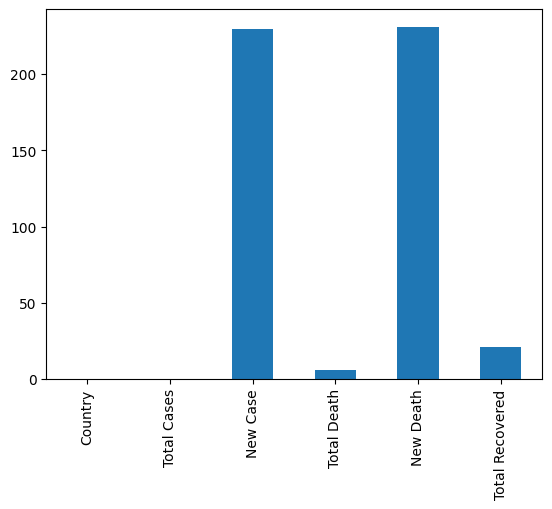

In [ ]:
df.isna().sum().plot.bar()

<Axes: >

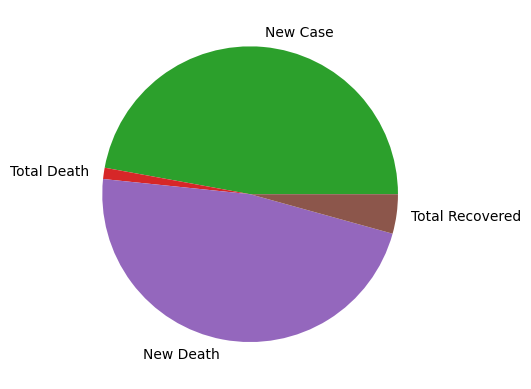

In [ ]:
df.isna().sum().plot.pie()

In [ ]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
Country,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Total Cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
New Case,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Total Death,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,True,False,False,True,False
New Death,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Total Recovered,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


<Axes: >

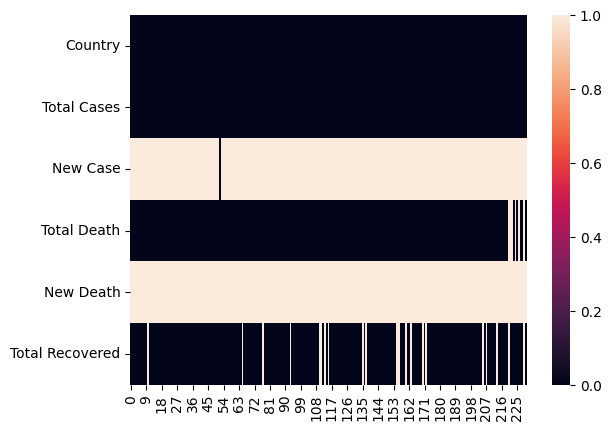

In [ ]:
import seaborn as sns
sns.heatmap(df.isna().transpose())